In [1]:
# Imports all packages necessary or useful

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
# Reads our medical_market_basket data csv file for analysis

df = pd.read_csv(r'C:\Users\caleb\OneDrive\Desktop\WGU\D212 - Data Mining II\medical_market_basket.csv')

In [3]:
# Profiles our csv file following importing data
# We appreciate 7501 non-null values in our first variable, 'Presc01'

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Presc01  7501 non-null   object
 1   Presc02  5747 non-null   object
 2   Presc03  4389 non-null   object
 3   Presc04  3345 non-null   object
 4   Presc05  2529 non-null   object
 5   Presc06  1864 non-null   object
 6   Presc07  1369 non-null   object
 7   Presc08  981 non-null    object
 8   Presc09  654 non-null    object
 9   Presc10  395 non-null    object
 10  Presc11  256 non-null    object
 11  Presc12  154 non-null    object
 12  Presc13  87 non-null     object
 13  Presc14  47 non-null     object
 14  Presc15  25 non-null     object
 15  Presc16  8 non-null      object
 16  Presc17  4 non-null      object
 17  Presc18  4 non-null      object
 18  Presc19  3 non-null      object
 19  Presc20  1 non-null      object
dtypes: object(20)
memory usage: 2.3+ MB


In [4]:
# Pulls an example transaction from our data frame, modifiable by selecting interger location

df.iloc[8]

Presc01    NaN
Presc02    NaN
Presc03    NaN
Presc04    NaN
Presc05    NaN
Presc06    NaN
Presc07    NaN
Presc08    NaN
Presc09    NaN
Presc10    NaN
Presc11    NaN
Presc12    NaN
Presc13    NaN
Presc14    NaN
Presc15    NaN
Presc16    NaN
Presc17    NaN
Presc18    NaN
Presc19    NaN
Presc20    NaN
Name: 8, dtype: object

In [5]:
# Describes the shape our or initial data frame

df.shape

(15002, 20)

In [6]:
# Gives us a snapshot of values contained in each of our variables

pd.set_option("display.max_columns", 0)
df.head()

,Presc01,Presc02,Presc03,Presc04,Presc05,Presc06,Presc07,Presc08,Presc09,Presc10,Presc11,Presc12,Presc13,Presc14,Presc15,Presc16,Presc17,Presc18,Presc19,Presc20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,amlodipine,albuterol aerosol,allopurinol,pantoprazole,lorazepam,omeprazole,mometasone,fluconozole,gabapentin,pravastatin,cialis,losartan,metoprolol succinate XL,sulfamethoxazole,abilify,spironolactone,albuterol HFA,levofloxacin,promethazine,glipizide
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,citalopram,benicar,amphetamine salt combo xr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Reframes our data to only include rows with non-null values

df = df[df['Presc01'].notna()]
df.head()

,Presc01,Presc02,Presc03,Presc04,Presc05,Presc06,Presc07,Presc08,Presc09,Presc10,Presc11,Presc12,Presc13,Presc14,Presc15,Presc16,Presc17,Presc18,Presc19,Presc20
1,amlodipine,albuterol aerosol,allopurinol,pantoprazole,lorazepam,omeprazole,mometasone,fluconozole,gabapentin,pravastatin,cialis,losartan,metoprolol succinate XL,sulfamethoxazole,abilify,spironolactone,albuterol HFA,levofloxacin,promethazine,glipizide
3,citalopram,benicar,amphetamine salt combo xr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,enalapril,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,paroxetine,allopurinol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,abilify,atorvastatin,folic acid,naproxen,losartan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Confirms our null rows are dropped; this shape should match our non-null count from earlier code

df.shape

(7501, 20)

In [9]:
# Converts our modified data frame to a list of lists

rows = []
for i in range (0, 7501):
    rows.append([str(df.values[i, j])
for j in range (0, 20)])

In [10]:
# Feeds our new list to TransactionEncoder

DE = TransactionEncoder()
array = DE.fit(rows).transform(rows)

In [11]:
# Converts our list to a new data frame

transaction = pd.DataFrame(array, columns = DE.columns_)

In [12]:
# Gives us a snapshot of our new data frame

transaction.head()

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,alprazolam,amitriptyline,amlodipine,amoxicillin,amphetamine,amphetamine salt combo,amphetamine salt combo xr,atenolol,atorvastatin,azithromycin,benazepril,benicar,boniva,bupropion sr,carisoprodol,carvedilol,cefdinir,celebrex,celecoxib,cephalexin,cialis,ciprofloxacin,citalopram,clavulanate K+,clonazepam,clonidine HCI,clopidogrel,clotrimazole,codeine,crestor,...,methylprednisone,metoprolol,metoprolol succinate XL,metoprolol tartrate,mometasone,nan,naproxen,omeprazole,oxycodone,pantoprazole,paroxetine,pioglitazone,potassium Chloride,pravastatin,prednisone,pregabalin,promethazine,quetiapine,ranitidine,rosuvastatin,salmeterol inhaler,sertraline HCI,simvastatin,spironolactone,sulfamethoxazole,synthroid,tamsulosin,temezepam,topiramate,tramadol,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
# Prints a list of all the variables in our new data frame

for col in transaction.columns:
    print(col)

Duloxetine
Premarin
Yaz
abilify
acetaminophen
actonel
albuterol HFA
albuterol aerosol
alendronate
allopurinol
alprazolam
amitriptyline
amlodipine
amoxicillin
amphetamine
amphetamine salt combo
amphetamine salt combo xr
atenolol
atorvastatin
azithromycin
benazepril
benicar
boniva
bupropion sr
carisoprodol
carvedilol
cefdinir
celebrex
celecoxib
cephalexin
cialis
ciprofloxacin
citalopram
clavulanate K+
clonazepam
clonidine HCI
clopidogrel
clotrimazole
codeine
crestor
cyclobenzaprine
cymbalta
dextroamphetamine XR
diazepam
diclofenac sodium
doxycycline hyclate
enalapril
escitalopram
esomeprazole
ezetimibe
fenofibrate
fexofenadine
finasteride
flovent hfa 110mcg inhaler
fluconozole
fluoxetine HCI
fluticasone
fluticasone nasal spray
folic acid
furosemide
gabapentin
glimepiride
glipizide
glyburide
hydrochlorothiazide
hydrocodone
hydrocortisone 2.5% cream
ibuprophen
isosorbide mononitrate
lansoprazole
lantus
levofloxacin
levothyroxine sodium
lisinopril
lorazepam
losartan
lovastatin
meloxicam
met

In [14]:
# Drops null columns in our new data frame

cleaned_df = transaction.drop(['nan'], axis = 1)
cleaned_df.head(7501)

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,alprazolam,amitriptyline,amlodipine,amoxicillin,amphetamine,amphetamine salt combo,amphetamine salt combo xr,atenolol,atorvastatin,azithromycin,benazepril,benicar,boniva,bupropion sr,carisoprodol,carvedilol,cefdinir,celebrex,celecoxib,cephalexin,cialis,ciprofloxacin,citalopram,clavulanate K+,clonazepam,clonidine HCI,clopidogrel,clotrimazole,codeine,crestor,...,metformin HCI,methylprednisone,metoprolol,metoprolol succinate XL,metoprolol tartrate,mometasone,naproxen,omeprazole,oxycodone,pantoprazole,paroxetine,pioglitazone,potassium Chloride,pravastatin,prednisone,pregabalin,promethazine,quetiapine,ranitidine,rosuvastatin,salmeterol inhaler,sertraline HCI,simvastatin,spironolactone,sulfamethoxazole,synthroid,tamsulosin,temezepam,topiramate,tramadol,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,Fa

In [15]:
# Confirms the shape of our data

cleaned_df.shape

(7501, 119)

In [16]:
# Creates a frame of the 5 most commonly reported items/medications in our list (adjustable per head argument)

count = cleaned_df.loc[:, :].sum()
popular_med = count.sort_values(0, ascending = False).head(5)
popular_med = popular_med.to_frame()
popular_med = popular_med.reset_index()
popular_med = popular_med.rename(columns = {'index': 'Medication',0: 'count'})

C:\Users\caleb\AppData\Local\Temp\ipykernel_12264\202796528.py:4: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  popular_med = count.sort_values(0, ascending = False).head(5)


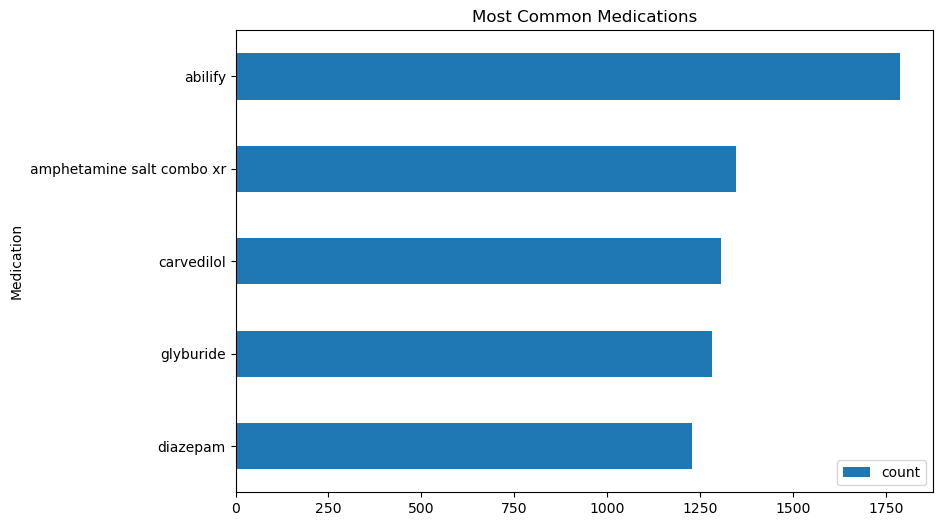

In [17]:
# Plots our 5 most commononly observed medications

plt.rcParams['figure.figsize'] = (9, 6)
ax = popular_med.plot.barh(x = 'Medication', y = 'count')
plt.title('Most Common Medications')
plt.gca().invert_yaxis()
plt.show()

In [18]:
# Creates our apriori algorithm with a minimum support of 0.02 (0.02 serves as an arbitrary starting figure; may be modified)

rules = apriori(cleaned_df, min_support = 0.02, use_colnames = True)
rules.head(5)

,support,itemsets
0,0.046794,(Premarin)
1,0.238368,(abilify)
2,0.020397,(albuterol aerosol)
3,0.033329,(allopurinol)
4,0.079323,(alprazolam)


In [19]:
# Creates an association rules table describing the relationships between items
# 'lift' metric descibes strength of likelihood of items being related, where higher value signifies a stronger relationship
# A threshold minimum of 1 describes a significant relationship

rules_table = association_rules(rules, metric = 'lift', min_threshold = 1)
rules_table.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(abilify),(amlodipine),0.238368,0.071457,0.023597,0.098993,1.385352,0.006564,1.030562,0.365218
1,(amlodipine),(abilify),0.071457,0.238368,0.023597,0.330224,1.385352,0.006564,1.137144,0.299568
2,(amphetamine salt combo),(abilify),0.068391,0.238368,0.024397,0.356725,1.496530,0.008095,1.183991,0.356144
3,(abilify),(amphetamine salt combo),0.238368,0.068391,0.024397,0.102349,1.496530,0.008095,1.037830,0.435627
4,(abilify),(amphetamine salt combo xr),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
5,(amphetamine salt combo xr),(abilify),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
6,(abilify),(atorvastatin),0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850,0.467950
7,(atorvastatin),(abilify),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650,0.409465
8,(abilify),(carvedilol),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
9,(carvedilol),(abilify),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437


In [20]:
# Sorts our rules table by the 5 most frequently paired medications
# We choose 10 as a head as each antecendent medication will have its consequent medication immediately follow in the next row

rules_table.sort_values('support', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(abilify),(carvedilol),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
9,(carvedilol),(abilify),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
19,(diazepam),(abilify),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
18,(abilify),(diazepam),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197
4,(abilify),(amphetamine salt combo xr),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
5,(amphetamine salt combo xr),(abilify),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
6,(abilify),(atorvastatin),0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850,0.467950
7,(atorvastatin),(abilify),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650,0.409465
29,(lisinopril),(abilify),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369
28,(abilify),(lisinopril),0.238368,0.098254,0.040928,0.171700,1.747522,0.017507,1.088672,0.561638


In [21]:
# Sorts our 3 most common medications in 'rules_table' by 'confidence' as a metric
# Confidence describes the probability that a consequent will follow a given antecedent

top_rules_con = rules_table.sort_values('confidence', ascending = False).head(3)
top_rules_con

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
31,(metformin),(abilify),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221
24,(glipizide),(abilify),0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962,0.461536
29,(lisinopril),(abilify),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369


In [22]:
# Sorts our 3 most commonly paired medications in 'rules_table' by 'lift' as a metric
# Lift describes the likelihood of a consequent appearing in a transaction
# Lift score equal to 1 indicates no change in likelihood of consequent appearing in transaction
# Lift score > 1 indicates increased likelihood
# Lift score < 1 indicates decreased likelihood

top_rules_lift = rules_table.sort_values('lift', ascending = False).head(6)
top_rules_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
74,(carvedilol),(lisinopril),0.174110,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716,0.682343
75,(lisinopril),(carvedilol),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
72,(glipizide),(carvedilol),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,0.535186
73,(carvedilol),(glipizide),0.174110,0.065858,0.022930,0.131700,1.999758,0.011464,1.075829,0.605334
31,(metformin),(abilify),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221
30,(abilify),(metformin),0.238368,0.050527,0.023064,0.096756,1.914955,0.011020,1.051182,0.627330


In [23]:
# Sorts our 3 most commonly paired medications in 'rules_table' by 'support' as a metric
# Support describes the percentage of transactions that includes a specific association rule (antecedent/consequent)

top_rules_sup = rules_table.sort_values('support', ascending = False).head(6)
top_rules_sup

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(abilify),(carvedilol),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
9,(carvedilol),(abilify),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
19,(diazepam),(abilify),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
18,(abilify),(diazepam),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197
4,(abilify),(amphetamine salt combo xr),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
5,(amphetamine salt combo xr),(abilify),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
